# 🛳️ Titanic EDA & Predictive Modeling Project

A comprehensive exploratory data analysis and predictive modeling of the Titanic dataset to understand survival factors and build a logistic regression classifier.

## Importing Required Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [8]:
# Load dataset
df = pd.read_csv('../data/train.csv')

# Display shape and head
print(f"Dataset shape: {df.shape}")

# Overview of the data
df.head()

Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Basic Info and Summary

### Summary statistics

In [136]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Initial Observations
- Dataset contains 891 rows and 12 columns.
- Columns like Age, Cabin, and Embarked have missing values.
- Target variable is 'Survived' (0 = No, 1 = Yes).

## 📊 Univariate Analysis
Exploring individual (univariate) features in the dataset to understand their distributions and properties. This includes numerical and categorical columns.

### Numerical Features: Histograms and Boxplots

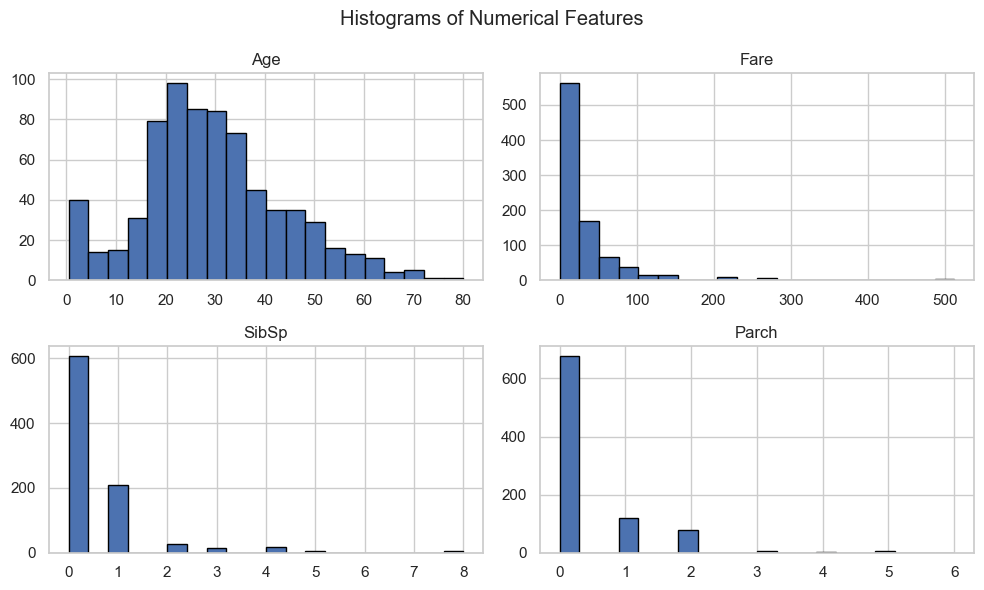

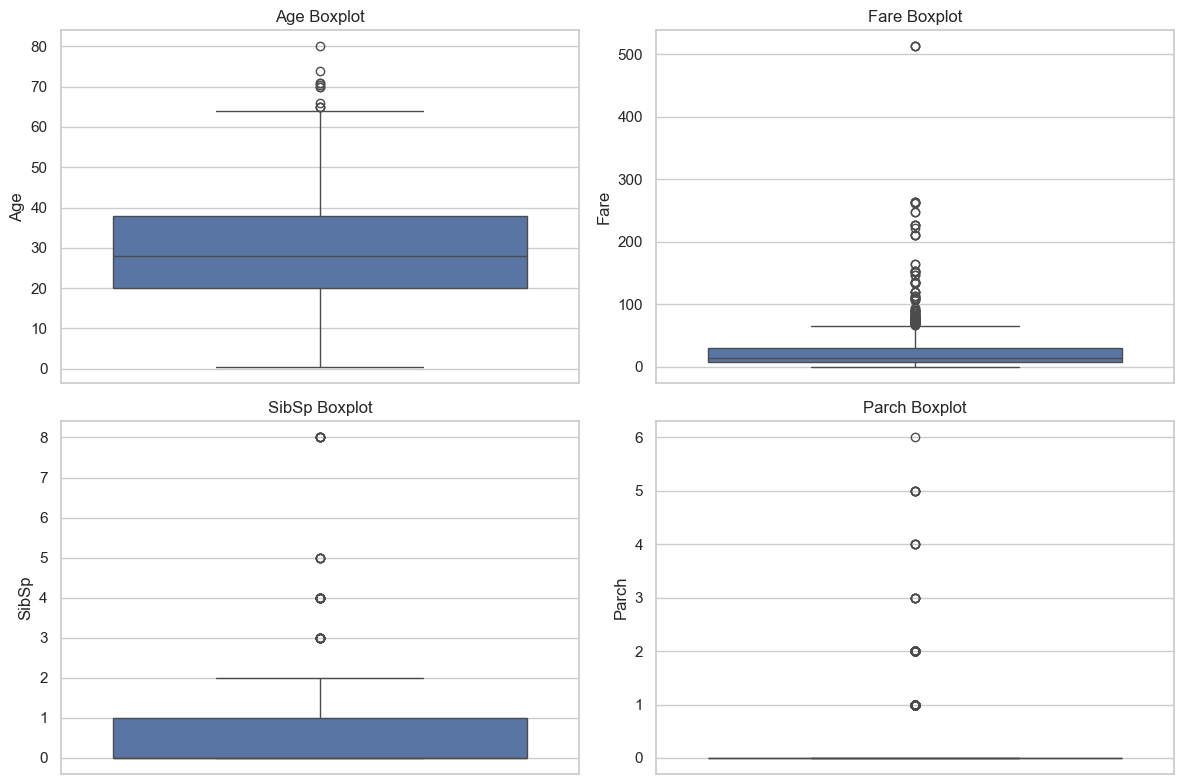

In [137]:
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[numerical_cols].hist(figsize=(10, 6), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col)
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()


### Categorical Features: Count Plots

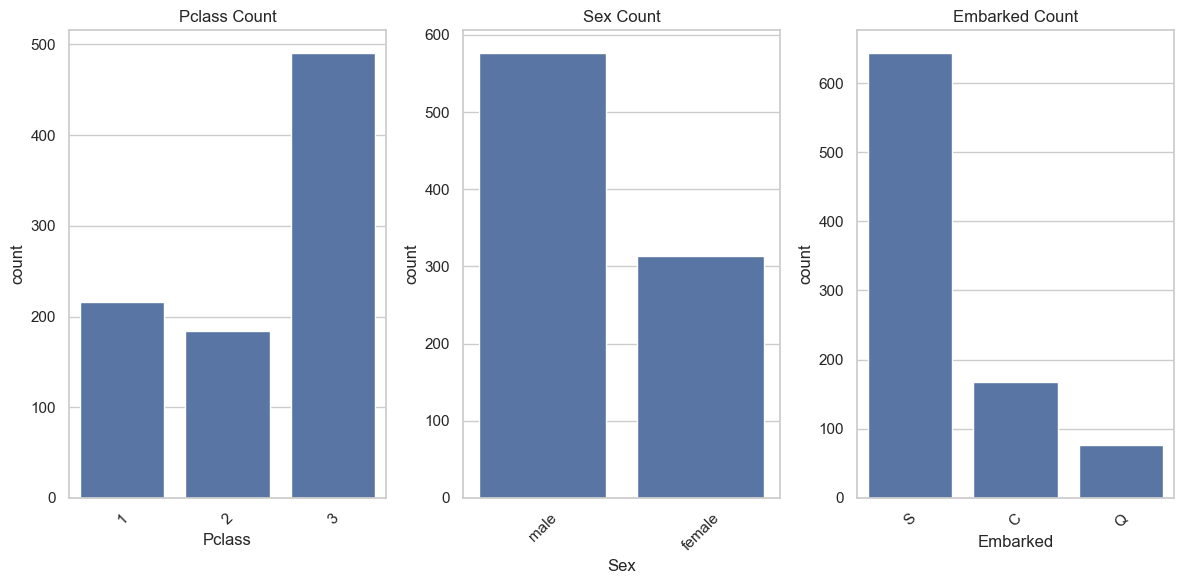

In [138]:
categorical_cols = ['Pclass', 'Sex', 'Embarked']
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f"{col} Count")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 📊 Bivariate Analysis — Feature vs Survived
Visualizing relationships between different variables and the target variable `Survived`.

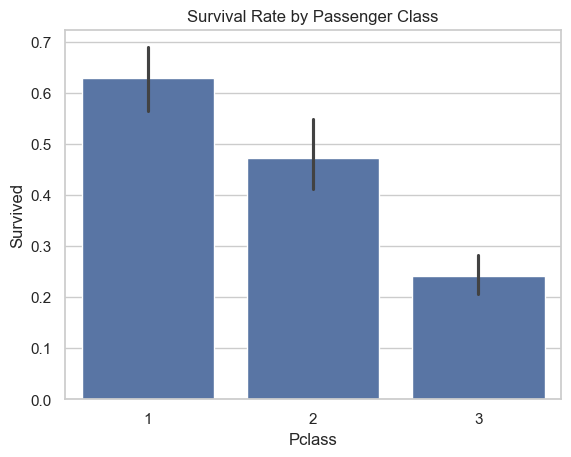

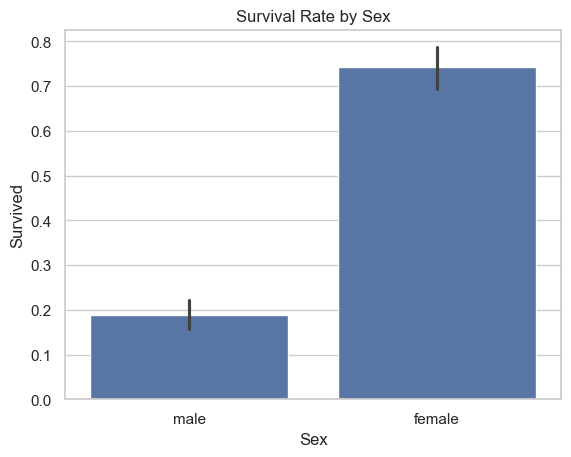

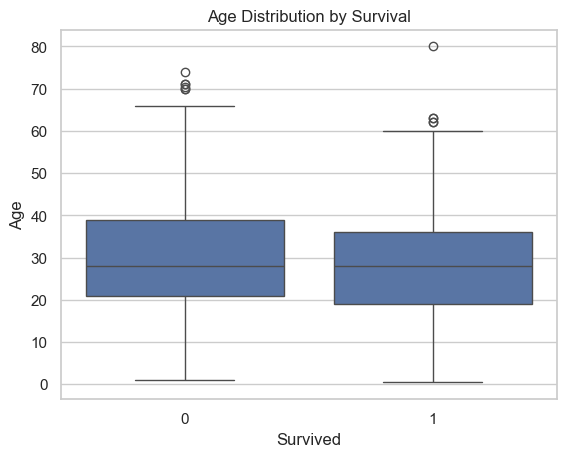

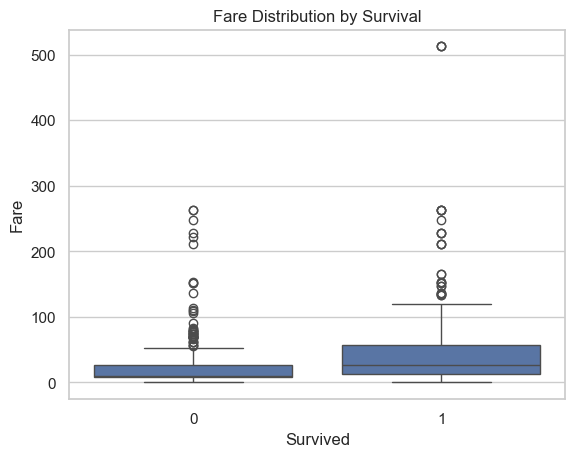

In [139]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()

## 🧹 Data Cleaning
Cleaning the dataset by handling missing values and removing outliers.

Visualized missing data using heatmap

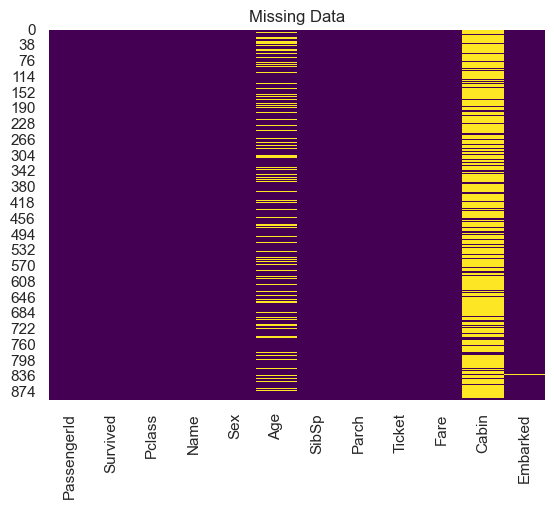

In [140]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data')
plt.show()

Fill missing Age with median

In [141]:
df['Age'] = df['Age'].fillna(df['Age'].median())

Filled missing values in `Embarked` with mode

In [142]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

Dropped columns `Ticket` and `Cabin`

In [143]:
df.drop(columns=['Ticket', 'Cabin'], inplace=True)

Used IQR method to detect and clip outliers in `Age` and `Fare`

In [144]:
for col in ['Age', 'Fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

## 🧪 Feature Engineering

In [145]:
# Extract Title
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# FamilySize and FamilyType
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FamilyType'] = pd.cut(df['FamilySize'], bins=[0,1,4,11], labels=['Single', 'Small', 'Large'])

# Age and Fare Binning
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'VeryHigh'])

# Encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title', 'FamilyType', 'AgeBin', 'FareBin'], drop_first=True)

# Drop unused columns
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True, errors='ignore')

## Correlation Heatmap

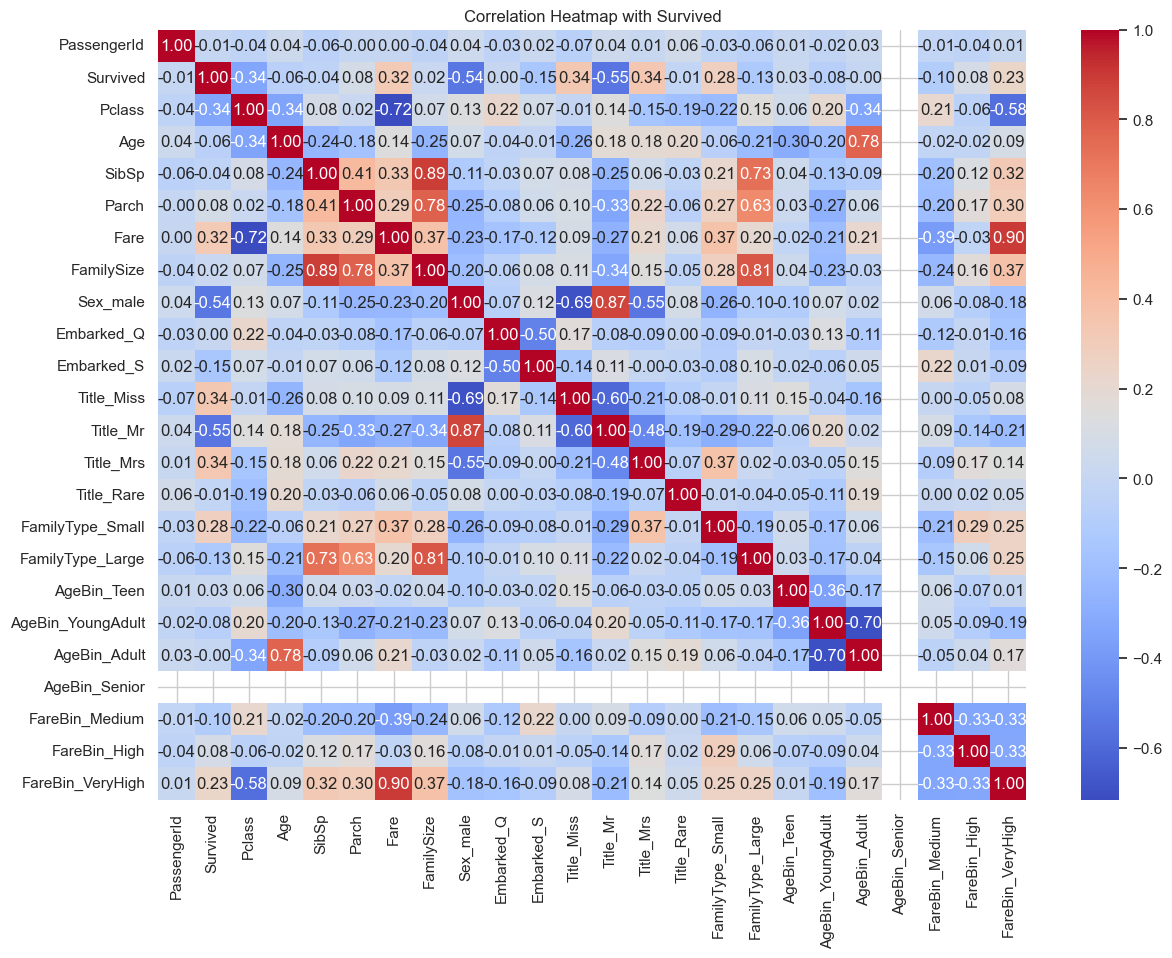

In [146]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap with Survived')
plt.show()

### 🔍 Observations from Correlation Heatmap

- **Pclass** is negatively correlated with `Survived` – lower class passengers had lower survival chances.
- **Sex_male** is strongly negatively correlated with `Survived`, confirming that **females had a higher survival rate**.
- **Fare** has a positive correlation with `Survived` – passengers who paid more were more likely to survive.
- **Title_Mr** is negatively correlated, while **Title_Miss** and **Title_Mrs** are positively correlated with survival.
- **FamilySize** and **FamilyType_Small** have moderate positive correlation with `Survived`, suggesting small families had better chances.
- **AgeBin_Child** and **AgeBin_YoungAdult** showed small correlations, indicating age group had limited influence.
- Some one-hot encoded features show minor correlations but help with model performance by adding categorical context.


## 🔍 Handling Missing Values & Feature Scaling

In [147]:
from sklearn.preprocessing import StandardScaler

df_encoded = pd.get_dummies(df)
missing_values = df_encoded.isnull().sum()
print(missing_values[missing_values > 0])

scaler = StandardScaler()
num_features = ['Age', 'Fare', 'FamilySize']
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])

Series([], dtype: int64)


##  🤖 Model Building — Logistic Regression

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

X = df_encoded.drop('Survived', axis=1)
y = df_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8101
ROC AUC Score: 0.8828
[[88 17]
 [17 57]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## ROC curve

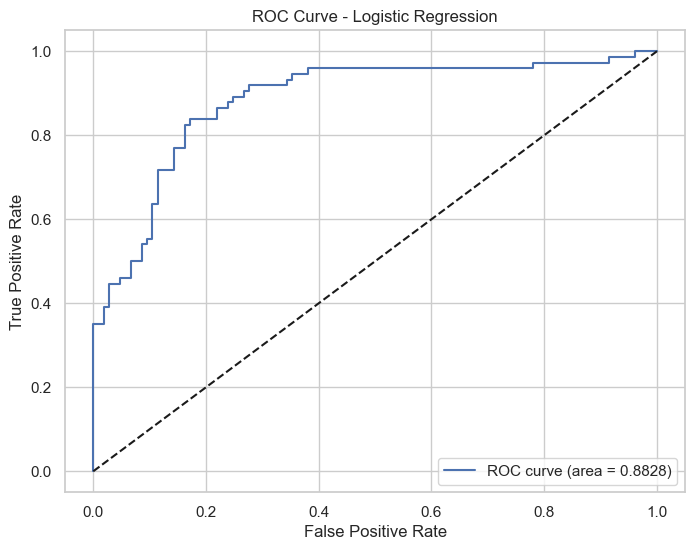

In [151]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


### 🔍 Final Observations
- Logistic regression performed reasonably with good accuracy and ROC AUC.
- Feature engineering improved data richness.
- Data cleaning and encoding handled missing values effectively.
- Insights from EDA aligned with domain expectations (female and upper-class survival advantage). 